In [203]:
"""
*의사결정 트리
장점 : 예측, 분류 결과가 왜 이렇게 나왔는지 설명하기 용이
단점 : 과적합 문제가 항상 따라다님
*앙상블 기법 : 의사결정트리의 과접합 문제를 해결하기 위해 사용
- 여러개의 모델을 생성하고 투표를 통해 다수결로 판단,예측( weak한 모델 여러개 조합 -> strong 모델 생성)
- 일반화가 잘된 모델들을 만들수 있다.
- 다양한 오류들이 나오더라도 해결하기 쉬움
>하드보팅 - 다수결 원칙(예측된 값중에 최대 득표 받은 예측값으로 결론 도출)
>소프트보팅 - 각각의 분류기들이 출력한 확률들을 합한값중 최대점수를 가진 분류값을 결과로 도출
ex) 7이라는 숫자이미지를 넣었을때 각각의 분류기들이 투표한 예상 숫자들 확률값을 각각 더해 가장 높은 확률값을 결과값으로
    소프트 보팅이 하드 보팅보다 성능이 대체로 좋다
>배깅 - 부트스트랩 + 어그리게이팅  <-> 페이스팅 : 중복 허용 x
-전체 데이터 셋에서 샘플링을 하는데 이때 중복허용하여 모델 만듬 -> 같은 알고리즘 사용하여 모델 만듬(보팅은 다른 알고리즘 사용)
-샘플을 여러번 추출할때 중복을 허용(표본 추출)
-대표적 모델 : 랜덤 포레스트
>>어그리게이팅 - 여러 분류 모델이 예측한 값들을 조합해서 하나의 결론을 도출하는 과정, 결론은 투표로
>부스팅 : 이전 분류기의 학습 결과를 바탕으로 다음 분류기의 학습 데이터의 샘플 가중치를 조정하여 학습
ex) 데이터를 샘플링하고 그 데이터중 틀린 데이터(분류 잘못된 데이터)에 대하여 가중치를 더해 다음 학습때 샘플링 되게함
부스팅 = 샘플 -> 학습 알고리즘 -> 분류기1 -> 가중치 업데이트 -> 샘플 2 -> 학습 알고리즘 -> 분류기2-> 가중치 업데이트...끝
*랜덤 포레스트 - 다수의 결정 트리들을 배깅해 예측 실행하는 앙상블 기법
-각 노드에 주어진 데이터를 샘플링 해서 일부 데이터를 제외한 최적의 특징을 찾아 트리 분리
-모델의 편향을 증가 시켜 과대적합의 위험 감소
-배깅을 이용한 포레스트 구성 ; 트리들이 서로 조금씩 다른 특성을 갖게 되어 일반화 성능 향상 가능
>> 분산, 편향 : 각각의 예측값 사이 차이를 분산이라 하고 편향은 정답과 예측값사이 어느정도 떨어져 있나
              : 모델의 복잡성을 나타낼때에도 사용
편향
-> bias(편향)가 작다 = 예측값과 결과가 차이가 작다(정답에 가까움)
-> 편향이 작으면(분산은 높다) 훈련데이터에 대해 예측값과 정답이 거의 같지만 새로운 데이터를 사용할경우
   예측값에 대해 정확도가 낮게 나오며 이를 과적합이라함
-> 적당이 편향이 작으며 분산도 적당히 작은 모델이 가장 좋음
-> 편향 = (E[f^(x)]-f(x))^2  (예측값의 평균 - 정답)^2
- 수식 기호 = x : 데이터, f(x) : 정답, f^(x) : 예측값, E[ ] : 기대값(평균)
분산
-> 분산이 크다 = 예측값들이 많이 흩어져있다.
-> 분산 = 예측값과 예측값들의 평균 간의 차이에 대해 제곱한 값들의 평균  -> 예측값들 간의 흩어진 정도를 표현
        = E[(f^(x)- E(f^(x)))^2]
과소적합 : 편향이 높다, 분산은 낮다(정답과 예측값이 차이가 많이 남)
과대적합 : 편향이 낮다, 분산은 높다(정답 = 예측값)
- Error : y - y^(실제 - 예측)
랜덤포레스트 실습
n_estimators = 모델에서 사용할 트리 개수(홀수)
max_features = 최적의 분할을 위해 고려할 피처의 최대 개수(default = "sqrt"제곱근)
max_depth = 트리의 최대깊이(5) ( internal node = 아래쪽으로 자식이 있는 노드)
min_samples_leaf = 리프 노드가 되기 위한 최소 샘플 데이터 개수(리프노드 = 더이상 아래로 뻗어나갈수 없는 상태의 노드들,
                                                               값을 2로 설정시 2개가 돠면 리프노드가 된다)
min_samples_split = 자식노드를 갖기 위한 최소한의 데이터 개수(과적합을 제어 하기 위해 쓰인다 =
                                                            숫자가 너무 작으면 계속해서 분할이 됨으로 적당히 작은 수로 해서 오버피팅 방지)
"""

'\n*의사결정 트리\n장점 : 예측, 분류 결과가 왜 이렇게 나왔는지 설명하기 용이\n단점 : 과적합 문제가 항상 따라다님\n*앙상블 기법 : 의사결정트리의 과접합 문제를 해결하기 위해 사용\n- 여러개의 모델을 생성하고 투표를 통해 다수결로 판단,예측( weak한 모델 여러개 조합 -> strong 모델 생성)\n- 일반화가 잘된 모델들을 만들수 있다.\n- 다양한 오류들이 나오더라도 해결하기 쉬움\n>하드보팅 - 다수결 원칙(예측된 값중에 최대 득표 받은 예측값으로 결론 도출)\n>소프트보팅 - 각각의 분류기들이 출력한 확률들을 합한값중 최대점수를 가진 분류값을 결과로 도출\nex) 7이라는 숫자이미지를 넣었을때 각각의 분류기들이 투표한 예상 숫자들 확률값을 각각 더해 가장 높은 확률값을 결과값으로\n    소프트 보팅이 하드 보팅보다 성능이 대체로 좋다\n>배깅 - 부트스트랩 + 어그리게이팅  <-> 페이스팅 : 중복 허용 x\n-전체 데이터 셋에서 샘플링을 하는데 이때 중복허용하여 모델 만듬 -> 같은 알고리즘 사용하여 모델 만듬(보팅은 다른 알고리즘 사용)\n-샘플을 여러번 추출할때 중복을 허용(표본 추출)\n-대표적 모델 : 랜덤 포레스트\n>>어그리게이팅 - 여러 분류 모델이 예측한 값들을 조합해서 하나의 결론을 도출하는 과정, 결론은 투표로\n>부스팅 : 이전 분류기의 학습 결과를 바탕으로 다음 분류기의 학습 데이터의 샘플 가중치를 조정하여 학습\nex) 데이터를 샘플링하고 그 데이터중 틀린 데이터(분류 잘못된 데이터)에 대하여 가중치를 더해 다음 학습때 샘플링 되게함\n부스팅 = 샘플 -> 학습 알고리즘 -> 분류기1 -> 가중치 업데이트 -> 샘플 2 -> 학습 알고리즘 -> 분류기2-> 가중치 업데이트...끝\n*랜덤 포레스트 - 다수의 결정 트리들을 배깅해 예측 실행하는 앙상블 기법\n-각 노드에 주어진 데이터를 샘플링 해서 일부 데이터를 제외한 최적의 특징을 찾아 트리 분리\n-모델의 편향을 증가 시켜 과대적합의 위험 감소\n-배깅을 

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [206]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [207]:
train['Survived'].groupby(train['Pclass']).mean()
#생존률 survived의 값이 1이면 생존 0이면 사망
#1등실에 해당하는 survived의 값을 평균 => 생존률,

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

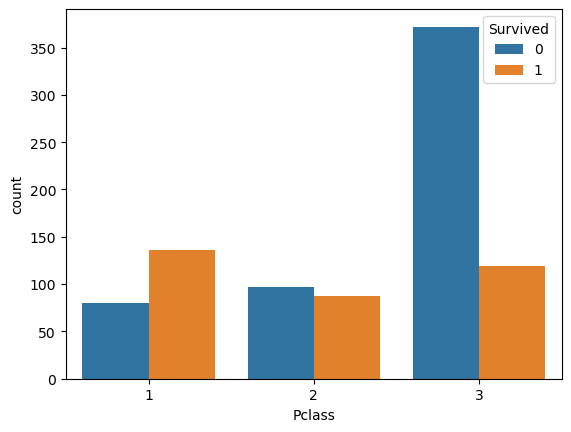

In [208]:
sns.countplot(x=train['Pclass'], hue=train['Survived'])

In [209]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name_Title, dtype: int64

In [210]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))

In [211]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,24


In [212]:
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [213]:
pd.qcut(train['Name_Len'],5).value_counts()

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

In [214]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [215]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [216]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [217]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [218]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [219]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [220]:
train['Ticket_Len']

0       9
1       8
2      16
3       6
4       6
       ..
886     6
887     6
888    10
889     6
890     6
Name: Ticket_Len, Length: 891, dtype: int64

In [221]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [222]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x:x[0])
#train['Ticket'].str[0]

In [223]:
train['Ticket_Lett'].value_counts() #티켓 첫번쨰 문자가 선실위치와 관련..?

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [224]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [225]:
pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [226]:
train.groupby(pd.qcut(train['Fare'], 3))['Survived'].mean()
#train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [227]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


In [228]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [229]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [230]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [231]:
train['Cabin'].isnull().sum()

687

In [232]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [233]:
train['Cabin_num'] =train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
#"ab cde" -> "de"

In [234]:
train['Cabin_num'].replace('an', np.NaN, inplace = True)

In [235]:
train['Cabin_num']

0      NaN
1       85
2      NaN
3      123
4      NaN
      ... 
886    NaN
887     42
888    NaN
889    148
890    NaN
Name: Cabin_num, Length: 891, dtype: object

In [236]:
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [237]:
train['Cabin_num']

0        NaN
1       85.0
2        NaN
3      123.0
4        NaN
       ...  
886      NaN
887     42.0
888      NaN
889    148.0
890      NaN
Name: Cabin_num, Length: 891, dtype: float64

In [238]:
pd.qcut(train['Cabin_num'],3).value_counts()

(1.999, 28.667]     67
(65.667, 148.0]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [239]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [240]:
train['Survived'].corr(train['Cabin_num'])

-0.06384595922789371

In [241]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [242]:
train['Embarked'].value_counts(normalize=True) #normalize 정규화

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [243]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<Axes: xlabel='Embarked', ylabel='count'>

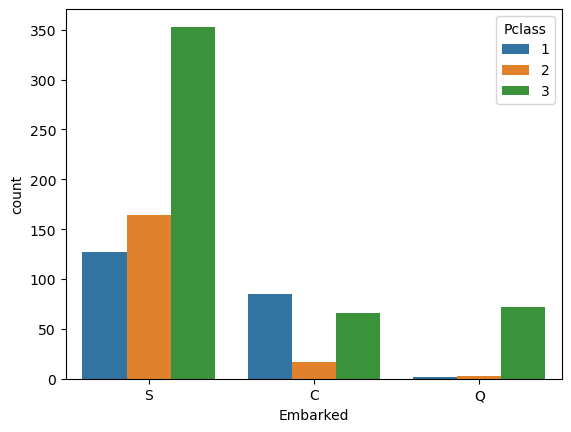

In [244]:
sns.countplot(x=train['Embarked'], hue=train['Pclass'])

In [245]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [246]:
train,test=names(train,test)

In [247]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,16,Mr.
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,32,Mrs.
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,25,Mr.
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,16,Mr.
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,44,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,18,Mr.
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,28,Dona.
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,28,Mr.
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,19,Mr.


In [248]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [249]:
train, test = age_impute(train, test)

In [250]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Cabin_num,Age_Null_Flag
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,23,9,A,n,NaN,0
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,51,8,P,C,85.0,0
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,22,16,S,n,NaN,0
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,44,6,1,C,123.0,0
4,5,0,3,male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,24,6,3,n,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,NaN,S,Rev.,21,6,2,n,NaN,0
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S,Miss.,28,6,1,B,42.0,0
888,889,0,3,female,16.123188,1,2,W./C. 6607,23.4500,NaN,S,Miss.,40,10,W,n,NaN,1
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C,Mr.,21,6,1,C,148.0,0


In [251]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

In [252]:
train, test = fam_size(train, test)

In [253]:
train

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Cabin_num,Age_Null_Flag,Fam_Size
0,1,0,3,male,22.000000,A/5 21171,7.2500,NaN,S,Mr.,23,9,A,n,NaN,0,Nuclear
1,2,1,1,female,38.000000,PC 17599,71.2833,C85,C,Mrs.,51,8,P,C,85.0,0,Nuclear
2,3,1,3,female,26.000000,STON/O2. 3101282,7.9250,NaN,S,Miss.,22,16,S,n,NaN,0,Solo
3,4,1,1,female,35.000000,113803,53.1000,C123,S,Mrs.,44,6,1,C,123.0,0,Nuclear
4,5,0,3,male,35.000000,373450,8.0500,NaN,S,Mr.,24,6,3,n,NaN,0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,211536,13.0000,NaN,S,Rev.,21,6,2,n,NaN,0,Solo
887,888,1,1,female,19.000000,112053,30.0000,B42,S,Miss.,28,6,1,B,42.0,0,Solo
888,889,0,3,female,16.123188,W./C. 6607,23.4500,NaN,S,Miss.,40,10,W,n,NaN,1,Nuclear
889,890,1,1,male,26.000000,111369,30.0000,C148,C,Mr.,21,6,1,C,148.0,0,Solo


In [254]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [255]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [256]:
train, test = ticket_grouped(train, test)

In [257]:
df=pd.DataFrame({'bt':['A','B',np.nan, 'O','AB']})#bt=blood type
df

,bt
0,A
1,B
2,NaN
3,O
4,AB


In [258]:
pd.get_dummies(df['bt'])

,A,AB,B,O
0,1,0,0,0
1,0,0,1,0
2,0,0,0,0
3,0,0,0,1
4,0,1,0,0


In [259]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [260]:
train, test = cabin_num(train, test)

In [261]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Name_Title,Name_Len,Ticket_Len,Ticket_Lett,Cabin_Letter,Age_Null_Flag,Fam_Size,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]"
0,1,0,3,male,22.000000,7.2500,NaN,S,Mr.,23,9,A,n,0,Nuclear,0,0,0
1,2,1,1,female,38.000000,71.2833,C85,C,Mrs.,51,8,P,C,0,Nuclear,0,0,1
2,3,1,3,female,26.000000,7.9250,NaN,S,Miss.,22,16,S,n,0,Solo,0,0,0
3,4,1,1,female,35.000000,53.1000,C123,S,Mrs.,44,6,1,C,0,Nuclear,0,0,1
4,5,0,3,male,35.000000,8.0500,NaN,S,Mr.,24,6,3,n,0,Solo,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000,NaN,S,Rev.,21,6,2,n,0,Solo,0,0,0
887,888,1,1,female,19.000000,30.0000,B42,S,Miss.,28,6,1,B,0,Solo,0,1,0
888,889,0,3,female,16.123188,23.4500,NaN,S,Miss.,40,10,Low_ticket,n,1,Nuclear,0,0,0
889,890,1,1,male,26.000000,30.0000,C148,C,Mr.,21,6,1,C,0,Solo,0,0,1


In [262]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [263]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [264]:
train, test = cabin(train, test)

In [265]:
train, test = embarked_impute(train, test)

In [266]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [267]:
train, test = drop(train, test)

In [268]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [269]:
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])

In [270]:
train.columns   #여기까지가 전처리

Index(['Survived', 'Age', 'Fare', 'Name_Len', 'Ticket_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Pclass_3', 'Pclass_1', 'Pclass_2',
       'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q',
       'Ticket_Lett_A', 'Ticket_Lett_P', 'Ticket_Lett_S', 'Ticket_Lett_1',
       'Ticket_Lett_3', 'Ticket_Lett_2', 'Ticket_Lett_C',
       'Ticket_Lett_Low_ticket', 'Ticket_Lett_Other_ticket', 'Cabin_Letter_n',
       'Cabin_Letter_C', 'Cabin_Letter_E', 'Cabin_Letter_G', 'Cabin_Letter_D',
       'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_F', 'Name_Title_Mr.',
       'Name_Title_Mrs.', 'Name_Title_Miss.', 'Name_Title_Master.',
       'Name_Title_Rev.', 'Name_Title_Dr.', 'Name_Title_Ms.',
       'Name_Title_Col.', 'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')

In [272]:
train

,Survived,Age,Fare,Name_Len,Ticket_Len,Age_Null_Flag,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Pclass_3,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,0,22.000000,7.2500,23,9,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,38.000000,71.2833,51,8,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,22,16,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,35.000000,53.1000,44,6,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,35.000000,8.0500,24,6,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,21,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
887,1,19.000000,30.0000,28,6,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
888,0,16.123188,23.4500,40,10,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
889,1,26.000000,30.0000,21,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [273]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
rf=RandomForestClassifier(n_estimators=1000, min_samples_split=10, min_samples_leaf= 1,
                      random_state=42)

In [276]:
rf.fit(train.iloc[:,1:] , train.iloc[:,0])#왼쪽에는 트레인의 x데이터

RandomForestClassifier(min_samples_split=10, n_estimators=1000, random_state=42)

In [277]:
test

,Age,Fare,Name_Len,Age_Null_Flag,Ticket_Len,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Pclass_3,Pclass_1,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,22.000000,7.8292,16,0,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,38.000000,7.0000,32,0,6,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.000000,9.6875,25,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,35.000000,8.6625,16,0,6,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,35.000000,12.2875,44,0,7,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,32.768293,8.0500,18,1,9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
414,44.000000,108.9000,28,0,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
415,33.515152,7.2500,28,0,18,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
416,34.000000,8.0500,19,1,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [278]:
train.columns

Index(['Survived', 'Age', 'Fare', 'Name_Len', 'Ticket_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Pclass_3', 'Pclass_1', 'Pclass_2',
       'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q',
       'Ticket_Lett_A', 'Ticket_Lett_P', 'Ticket_Lett_S', 'Ticket_Lett_1',
       'Ticket_Lett_3', 'Ticket_Lett_2', 'Ticket_Lett_C',
       'Ticket_Lett_Low_ticket', 'Ticket_Lett_Other_ticket', 'Cabin_Letter_n',
       'Cabin_Letter_C', 'Cabin_Letter_E', 'Cabin_Letter_G', 'Cabin_Letter_D',
       'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_F', 'Name_Title_Mr.',
       'Name_Title_Mrs.', 'Name_Title_Miss.', 'Name_Title_Master.',
       'Name_Title_Rev.', 'Name_Title_Dr.', 'Name_Title_Ms.',
       'Name_Title_Col.', 'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')

In [286]:
pd.concat((pd.DataFrame(train.iloc[:,1:].columns, columns=['var']),
pd.DataFrame(rf.feature_importances_, columns=['importance'])),axis=1).sort_values(by='importance', ascending=False)[:20]


,var,importance
33,Name_Title_Mr.,0.118185
11,Sex_male,0.115817
12,Sex_female,0.097546
1,Fare,0.089804
2,Name_Len,0.086674
0,Age,0.078854
8,Pclass_3,0.044222
3,Ticket_Len,0.032271
35,Name_Title_Miss.,0.031978
34,Name_Title_Mrs.,0.027484


In [291]:
test_df=list(test.columns)

In [288]:
train_df=list(train.columns)[1:]

In [289]:
train_df

['Age',
 'Fare',
 'Name_Len',
 'Ticket_Len',
 'Age_Null_Flag',
 'Cabin_num_(1.999, 28.667]',
 'Cabin_num_(28.667, 65.667]',
 'Cabin_num_(65.667, 148.0]',
 'Pclass_3',
 'Pclass_1',
 'Pclass_2',
 'Sex_male',
 'Sex_female',
 'Embarked_S',
 'Embarked_C',
 'Embarked_Q',
 'Ticket_Lett_A',
 'Ticket_Lett_P',
 'Ticket_Lett_S',
 'Ticket_Lett_1',
 'Ticket_Lett_3',
 'Ticket_Lett_2',
 'Ticket_Lett_C',
 'Ticket_Lett_Low_ticket',
 'Ticket_Lett_Other_ticket',
 'Cabin_Letter_n',
 'Cabin_Letter_C',
 'Cabin_Letter_E',
 'Cabin_Letter_G',
 'Cabin_Letter_D',
 'Cabin_Letter_A',
 'Cabin_Letter_B',
 'Cabin_Letter_F',
 'Name_Title_Mr.',
 'Name_Title_Mrs.',
 'Name_Title_Miss.',
 'Name_Title_Master.',
 'Name_Title_Rev.',
 'Name_Title_Dr.',
 'Name_Title_Ms.',
 'Name_Title_Col.',
 'Fam_Size_Nuclear',
 'Fam_Size_Solo',
 'Fam_Size_Big']

In [293]:
test=test[train_df] #train_df 순서대로 나열해줌

In [297]:
test=test[train_df]
test

,Age,Fare,Name_Len,Ticket_Len,Age_Null_Flag,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Pclass_3,Pclass_1,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,22.000000,7.8292,16,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,38.000000,7.0000,32,6,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.000000,9.6875,25,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,35.000000,8.6625,16,6,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,35.000000,12.2875,44,7,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,32.768293,8.0500,18,9,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
414,44.000000,108.9000,28,8,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
415,33.515152,7.2500,28,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
416,34.000000,8.0500,19,6,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [301]:
test1=pd.read_csv("test.csv")

In [304]:
pred=rf.predict(test)
pred=pd.DataFrame(pred,columns=['Survived'])
submission=pd.concat((test1.iloc[:,0], pred), axis=1)
submission.to_csv("mysubmission.csv", index=False)

In [305]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
